## Plot Results of Solving Ising Model using Density Matrix Renormalizaton Group

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
def mean_field_energy_density(lmbda):
    if np.abs(lmbda) <= 2:
        return -1 - lmbda ** 2 / 4
    return -np.abs(lmbda)

In [3]:
compiled_dir = f"..{os.sep}compiled"
data_dir = f"..{os.sep}data"
plot_dir = f"..{os.sep}plots"

In [8]:
program = f"{compiled_dir}{os.sep}dmrg_ising"

In [9]:
N = list(range(2, 3))

In [10]:
lam = np.arange(-5, 5.1, 0.1)

In [11]:
gs_energy = np.zeros((len(N), len(lam)))
gs_energy[:] = np.nan

In [12]:
max_iterations = np.zeros((len(N), len(lam)))
max_iterations[:] = np.nan

In [26]:
for i in range(len(N)):
    print(f"Running N = {N[i]} ...")
    for j in range(len(lam)):
        output = subprocess.run(
            [program, "--N", str(N[i]), "--lambda", str(lam[j])],
            stdout=subprocess.PIPE,
            encoding="ascii"
        )

        results = output.stdout.split("\n")

        did_converge = results[8].split("=")[1].strip()

        #if did_converge == "T":
        gs_energy[i, j] = float(results[6].split("=")[1])
        max_iterations[i, j] = int(results[7].split("=")[1])

Running N = 2 ...


In [27]:
max_iterations[0]

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50.])

In [28]:
gs_energy[0]

array([19.8018, 17.7505, 18.1569, 17.5393, 16.434 , 17.9246, 17.34  ,
       19.3245, 15.7316, 20.141 , 17.5283, 14.631 , 16.6249, 16.5303,
       17.8774, 16.9236, 16.8458, 14.1135, 16.4012, 17.5794, 17.9098,
       18.1301, 16.7744, 17.0363, 15.1481, 14.0761, 16.3117, 16.7656,
       16.1432, 16.6906, 17.2481, 17.2827, 14.9338, 17.3325, 16.977 ,
       16.5574, 15.714 , 17.818 , 17.7138, 15.8326, 17.7702, 14.383 ,
       17.7474, 17.1537, 14.8136, 17.6861, 15.4   , 16.961 , 18.3678,
       16.2946, 17.0772, 16.2648, 14.8383, 17.8214, 15.5002, 17.2552,
       15.8052, 17.8438, 18.4661, 15.4685, 16.955 , 18.0707, 16.1966,
       16.801 , 17.8913, 17.8082, 16.7224, 18.2673, 17.4299, 18.4187,
       16.7216, 15.5216, 14.2697, 16.5921, 16.7978, 17.6644, 17.678 ,
       15.9511, 18.7732, 17.7329, 15.565 , 17.228 , 16.9135, 16.8108,
       15.4614, 16.8826, 14.9993, 17.457 , 17.2144, 18.528 , 18.8813,
       19.2627, 15.164 , 19.667 , 16.0834, 15.7534, 14.4576, 18.8018,
       19.5125, 17.4

In [29]:
mf_gs_energy = [mean_field_energy_density(l) for l in lam]

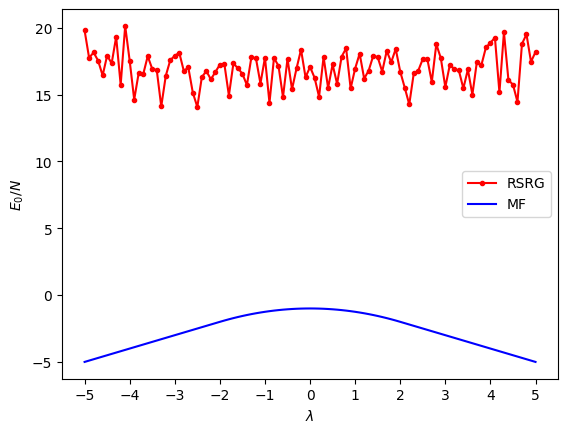

In [31]:
plt.plot(lam, gs_energy[0], "r.-", label="RSRG")
plt.plot(lam, mf_gs_energy, "b-", label="MF")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xticks(np.arange(-5, 6, 1))
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}energy_vs_lambda_dmrg.pdf", format="pdf", bbox_inches="tight")